## Day 31 Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Question 1:
### Use IRIS dataset from Sklearn and perform KNN. Compare with logistic regression.

In [2]:
#importing the iris dataset
from sklearn.datasets import load_iris

In [3]:
iris= load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
X=df.drop('target',axis=1)
y=df['target'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
#scalling the dataset
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Logistic regression

In [12]:
lr_model= LogisticRegression()

In [13]:
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)
lr_pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 1., 2., 1., 2.])

In [14]:
print("----------Logistic Regression results----------\n")
print("confusion_matrix : \n",confusion_matrix(y_test,lr_pred))
print()
print("classification_report :\n",classification_report(y_test,lr_pred))

----------Logistic Regression results----------

confusion_matrix : 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

classification_report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



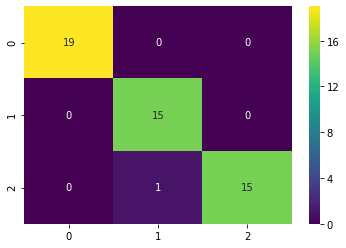

In [32]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,cmap='viridis')

In [15]:
accuracy_score(y_test,lr_pred)

0.98

### KNeighborsClassifier

In [16]:
# KNN 
knn= KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
knn_pred=knn.predict(X_test)
knn_pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 1., 2., 1., 2.])

In [19]:
print("----------KNeighborsClassifier results----------\n")

print("confusion_matrix : \n",confusion_matrix(y_test,knn_pred))
print()
print("classification_report :\n",classification_report(y_test,knn_pred))

----------KNeighborsClassifier results----------

confusion_matrix : 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

classification_report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



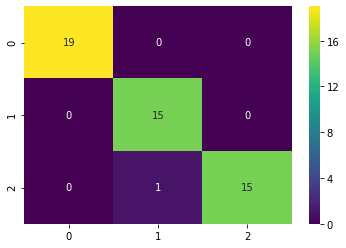

In [33]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,cmap='viridis')

In [20]:
accuracy_score(y_test,knn_pred)

0.98

### Conclude:
Both Logistic regression and K nearest Neighours have the same accuaracy.